In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")


In [5]:
train=pd.read_csv("G:/compete/ai/data_set/train_data.csv")
test=pd.read_csv("G:/compete/ai/data_set/test_a.csv")
train.head(5)

,ID,area,rentType,houseType,houseFloor,totalFloor,houseToward,houseDecoration,communityName,city,...,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeTime,tradeMoney
0,100309852,68.06,未知方式,2室1厅1卫,低,16,暂无数据,其他,XQ00051,SH,...,0,0.0000,28248,614,111546,1124.0,284.0,0,2018/11/28,2000.0
1,100307942,125.55,未知方式,3室2厅2卫,中,14,暂无数据,简装,XQ00130,SH,...,0,0.0000,14823,148,157552,701.0,22.0,1,2018/12/16,2000.0
2,100307764,132.00,未知方式,3室2厅2卫,低,32,暂无数据,其他,XQ00179,SH,...,0,0.0000,77645,520,131744,57.0,20.0,1,2018/12/22,16000.0
3,100306518,57.00,未知方式,1室1厅1卫,中,17,暂无数据,精装,XQ00313,SH,...,332760000,3080.0331,8750,1665,253337,888.0,279.0,9,2018/12/21,1600.0
4,100305262,129.00,未知方式,3室2厅3卫,低,2,暂无数据,毛坯,XQ01257,SH,...,0,0.0000,800,117,125309,2038.0,480.0,0,2018/11/18,2900.0


In [6]:
test.head(5)#查看前五行的信息

,ID,area,rentType,houseType,houseFloor,totalFloor,houseToward,houseDecoration,communityName,city,...,tradeLandArea,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeTime
0,100000079,36.54,未知方式,1室1厅1卫,高,21,西北,其他,XQ03867,SH,...,0.00,0,0.0,41503,319,301635,1601.0,397.0,2,2018/10/25
1,100000138,64.00,未知方式,2室1厅1卫,高,11,南北,其他,XQ00821,SH,...,0.00,0,0.0,4370,0,306857,21123.0,3066.0,0,2018/8/19
2,100000192,98.00,未知方式,3室1厅1卫,高,6,暂无数据,精装,XQ00842,SH,...,0.00,0,0.0,4370,0,306857,17471.0,2554.0,0,2018/3/4
3,100000200,43.45,未知方式,1室1厅1卫,高,6,暂无数据,其他,XQ00786,SH,...,0.00,0,0.0,4370,0,306857,19231.0,2016.0,0,2018/2/3
4,100000430,92.00,未知方式,2室2厅1卫,高,6,暂无数据,其他,XQ01201,SH,...,237828.35,1078790000,4536.0,20904,0,245872,26189.0,2957.0,0,2018/3/14


In [7]:
train.tail(5)#查看后5行信息

,ID,area,rentType,houseType,houseFloor,totalFloor,houseToward,houseDecoration,communityName,city,...,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeTime,tradeMoney
41435,100000438,10.0,合租,4室1厅1卫,高,11,北,精装,XQ01209,SH,...,573070000,4313.01,20904,0,245872,29635.0,2662.0,0,2018/2/5,2190.0
41436,100000201,7.1,合租,3室1厅1卫,中,6,北,精装,XQ00853,SH,...,0,0.00,4370,0,306857,28213.0,2446.0,0,2018/1/22,2090.0
41437,100000198,9.2,合租,4室1厅1卫,高,18,北,精装,XQ00852,SH,...,0,0.00,4370,0,306857,19231.0,2016.0,0,2018/2/8,3190.0
41438,100000182,14.1,合租,4室1厅1卫,低,8,北,精装,XQ00791,SH,...,0,0.00,4370,0,306857,17471.0,2554.0,0,2018/3/22,2460.0
41439,100000041,33.5,未知方式,1室1厅1卫,中,19,北,其他,XQ03246,SH,...,0,0.00,13192,990,406803,2556.0,717.0,1,2018/10/21,3000.0


In [8]:
train.columns#获取列名

Index(['ID', 'area', 'rentType', 'houseType', 'houseFloor', 'totalFloor',
       'houseToward', 'houseDecoration', 'communityName', 'city', 'region',
       'plate', 'buildYear', 'saleSecHouseNum', 'subwayStationNum',
       'busStationNum', 'interSchoolNum', 'schoolNum', 'privateSchoolNum',
       'hospitalNum', 'drugStoreNum', 'gymNum', 'bankNum', 'shopNum',
       'parkNum', 'mallNum', 'superMarketNum', 'totalTradeMoney',
       'totalTradeArea', 'tradeMeanPrice', 'tradeSecNum', 'totalNewTradeMoney',
       'totalNewTradeArea', 'tradeNewMeanPrice', 'tradeNewNum', 'remainNewNum',
       'supplyNewNum', 'supplyLandNum', 'supplyLandArea', 'tradeLandNum',
       'tradeLandArea', 'landTotalPrice', 'landMeanPrice', 'totalWorkers',
       'newWorkers', 'residentPopulation', 'pv', 'uv', 'lookNum', 'tradeTime',
       'tradeMoney'],
      dtype='object')

In [9]:
test.columns

Index(['ID', 'area', 'rentType', 'houseType', 'houseFloor', 'totalFloor',
       'houseToward', 'houseDecoration', 'communityName', 'city', 'region',
       'plate', 'buildYear', 'saleSecHouseNum', 'subwayStationNum',
       'busStationNum', 'interSchoolNum', 'schoolNum', 'privateSchoolNum',
       'hospitalNum', 'drugStoreNum', 'gymNum', 'bankNum', 'shopNum',
       'parkNum', 'mallNum', 'superMarketNum', 'totalTradeMoney',
       'totalTradeArea', 'tradeMeanPrice', 'tradeSecNum', 'totalNewTradeMoney',
       'totalNewTradeArea', 'tradeNewMeanPrice', 'tradeNewNum', 'remainNewNum',
       'supplyNewNum', 'supplyLandNum', 'supplyLandArea', 'tradeLandNum',
       'tradeLandArea', 'landTotalPrice', 'landMeanPrice', 'totalWorkers',
       'newWorkers', 'residentPopulation', 'pv', 'uv', 'lookNum', 'tradeTime'],
      dtype='object')

In [10]:
train.info()#查看各自段的信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41440 entries, 0 to 41439
Data columns (total 51 columns):
ID                    41440 non-null int64
area                  41440 non-null float64
rentType              41440 non-null object
houseType             41440 non-null object
houseFloor            41440 non-null object
totalFloor            41440 non-null int64
houseToward           41440 non-null object
houseDecoration       41440 non-null object
communityName         41440 non-null object
city                  41440 non-null object
region                41440 non-null object
plate                 41440 non-null object
buildYear             41440 non-null object
saleSecHouseNum       41440 non-null int64
subwayStationNum      41440 non-null int64
busStationNum         41440 non-null int64
interSchoolNum        41440 non-null int64
schoolNum             41440 non-null int64
privateSchoolNum      41440 non-null int64
hospitalNum           41440 non-null int64
drugStoreNum       

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 50 columns):
ID                    2469 non-null int64
area                  2469 non-null float64
rentType              2469 non-null object
houseType             2469 non-null object
houseFloor            2469 non-null object
totalFloor            2469 non-null int64
houseToward           2469 non-null object
houseDecoration       2469 non-null object
communityName         2469 non-null object
city                  2469 non-null object
region                2469 non-null object
plate                 2469 non-null object
buildYear             2469 non-null object
saleSecHouseNum       2469 non-null int64
subwayStationNum      2469 non-null int64
busStationNum         2469 non-null int64
interSchoolNum        2469 non-null int64
schoolNum             2469 non-null int64
privateSchoolNum      2469 non-null int64
hospitalNum           2469 non-null int64
drugStoreNum          2469 non-null int64

In [12]:
train.shape#查看数据集行列情况

(41440, 51)

In [13]:
test.shape

(2469, 50)

In [14]:
train.describe()#查看数据的大体情况

,ID,area,totalFloor,saleSecHouseNum,subwayStationNum,busStationNum,interSchoolNum,schoolNum,privateSchoolNum,hospitalNum,...,tradeLandArea,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeMoney
count,4.144000e+04,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,...,41440.000000,4.144000e+04,41440.000000,41440.000000,41440.000000,41440.000000,41422.000000,41422.000000,41440.000000,4.144000e+04
mean,1.001221e+08,70.959409,11.413152,1.338538,5.741192,187.197153,1.506395,48.228813,6.271911,4.308736,...,12621.406425,1.045363e+08,724.763918,77250.235497,1137.132095,294514.059459,26945.663512,3089.077085,0.396260,8.837074e+03
std,9.376566e+04,88.119569,7.375203,3.180349,4.604929,179.674625,1.687631,29.568448,4.946457,3.359714,...,49853.120341,5.215216e+08,3224.303831,132052.508523,7667.381627,196745.147181,32174.637924,2954.706517,1.653932,5.514287e+05
min,1.000000e+08,1.000000,0.000000,0.000000,0.000000,24.000000,0.000000,9.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,600.000000,0.000000,49330.000000,17.000000,6.000000,0.000000,0.000000e+00
25%,1.000470e+08,42.607500,6.000000,0.000000,2.000000,74.000000,0.000000,24.000000,2.000000,1.000000,...,0.000000,0.000000e+00,0.000000,13983.000000,0.000000,165293.000000,7928.000000,1053.000000,0.000000,2.800000e+03
50%,1.000960e+08,65.000000,7.000000,0.000000,5.000000,128.000000,1.000000,47.000000,5.000000,4.000000,...,0.000000,0.000000e+00,0.000000,38947.000000,0.000000,245872.000000,20196.000000,2375.000000,0.000000,4.000000e+03
75%,1.001902e+08,90.000000,16.000000,1.000000,7.000000,258.000000,3.000000,61.000000,9.000000,6.000000,...,0.000000,0.000000e+00,0.000000,76668.000000,0.000000,330610.000000,34485.000000,4233.000000,0.000000,5.500000e+03
max,1.003218e+08,15055.000000,88.000000,52.000000,22.000000,824.000000,8.000000,142.000000,24.000000,14.000000,...,555508.010000,6.197570e+09,37513.062490,855400.000000,143700.000000,928198.000000,621864.000000,39876.000000,37.000000,1.000000e+08


In [15]:
#查看数据缺失值
train_missing= train.isnull().sum().sort_values(ascending=False)
train_missing

uv                    18
pv                    18
tradeMoney             0
plate                  0
gymNum                 0
drugStoreNum           0
hospitalNum            0
privateSchoolNum       0
schoolNum              0
interSchoolNum         0
busStationNum          0
subwayStationNum       0
saleSecHouseNum        0
buildYear              0
region                 0
shopNum                0
city                   0
communityName          0
houseDecoration        0
houseToward            0
totalFloor             0
houseFloor             0
houseType              0
rentType               0
area                   0
bankNum                0
mallNum                0
parkNum                0
tradeTime              0
lookNum                0
residentPopulation     0
newWorkers             0
totalWorkers           0
landMeanPrice          0
landTotalPrice         0
tradeLandArea          0
tradeLandNum           0
supplyLandArea         0
supplyLandNum          0
supplyNewNum           0


In [16]:
#缺失数据的百分比
train_missing = (train.isnull().sum()/len(train))*100
train_missing = train_missing.drop(train_missing[train_missing==0].index).sort_values(ascending=False)
miss_data = pd.DataFrame({'缺失百分比':train_missing})
miss_data

,缺失百分比
uv,0.043436
pv,0.043436


In [23]:
test_missing= test.isnull().sum().sort_values(ascending=False)
test_missing

uv                    2
pv                    2
tradeTime             0
plate                 0
gymNum                0
drugStoreNum          0
hospitalNum           0
privateSchoolNum      0
schoolNum             0
interSchoolNum        0
busStationNum         0
subwayStationNum      0
saleSecHouseNum       0
buildYear             0
region                0
shopNum               0
city                  0
communityName         0
houseDecoration       0
houseToward           0
totalFloor            0
houseFloor            0
houseType             0
rentType              0
area                  0
bankNum               0
parkNum               0
lookNum               0
supplyNewNum          0
residentPopulation    0
newWorkers            0
totalWorkers          0
landMeanPrice         0
landTotalPrice        0
tradeLandArea         0
tradeLandNum          0
supplyLandArea        0
supplyLandNum         0
remainNewNum          0
mallNum               0
tradeNewNum           0
tradeNewMeanPric

In [17]:
#对最后一列观察
train['tradeMoney']

0         2000.0
1         2000.0
2        16000.0
3         1600.0
4         2900.0
5        14000.0
6         1000.0
7         1800.0
8         1450.0
9         1700.0
10        1500.0
11        2000.0
12        2200.0
13        1600.0
14        2500.0
15        6000.0
16        1600.0
17        2800.0
18        1800.0
19        1600.0
20        3400.0
21        1500.0
22        3600.0
23        8000.0
24        6000.0
25        3000.0
26        1300.0
27        2100.0
28        2200.0
29        1380.0
          ...   
41410     2970.0
41411     1890.0
41412     1890.0
41413     1860.0
41414    14000.0
41415     3630.0
41416     1990.0
41417     1990.0
41418     1890.0
41419     5800.0
41420     1660.0
41421     1560.0
41422     1460.0
41423     2690.0
41424     3990.0
41425     2290.0
41426     2760.0
41427    15000.0
41428    13500.0
41429     2990.0
41430     1430.0
41431     1690.0
41432     1690.0
41433     1460.0
41434     2290.0
41435     2190.0
41436     2090.0
41437     3190

In [18]:
train['tradeMoney'].describe()

count    4.144000e+04
mean     8.837074e+03
std      5.514287e+05
min      0.000000e+00
25%      2.800000e+03
50%      4.000000e+03
75%      5.500000e+03
max      1.000000e+08
Name: tradeMoney, dtype: float64

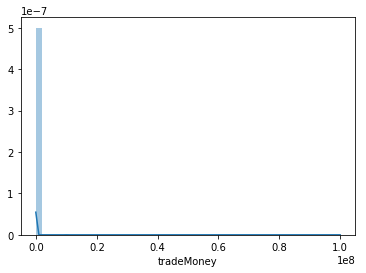

In [19]:
#对最后一列进行可视化
sns.distplot(train['tradeMoney'])
plt.show()

In [20]:
#这条直线代表极大值影响
#下面筛选目标变量的阈值
num = len(train.index)

for i in range(1, 10):
    s = i*10000
    print('{:<6}: {:.5f}'.format(s, len(train[train['tradeMoney'] < s]) / num))

10000 : 0.93316
20000 : 0.98625
30000 : 0.99534
40000 : 0.99771
50000 : 0.99831
60000 : 0.99889
70000 : 0.99908
80000 : 0.99930
90000 : 0.99944


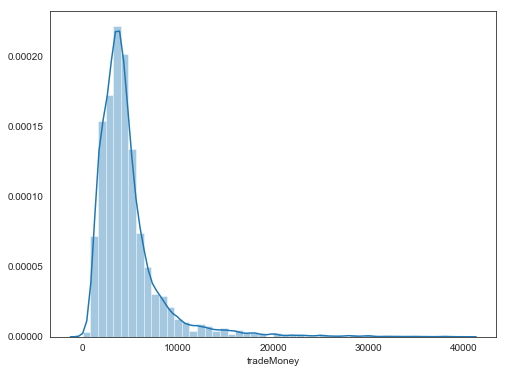

In [25]:
# 查看目标变量分布
train=train[train['tradeMoney']<50000]
sns.set_style('white')
fig, ax = plt.subplots(figsize=(8, 6))
sns.distplot(train['tradeMoney'])

In [26]:
# 偏度（skewness）也称为偏态、偏态系数，是统计数据分布偏斜方向和程度的度量，是统计数据分布非对称程度的数字特征。
# 峰度（peakedness;kurtosis）又称峰态系数。表征概率密度分布曲线在平均值处峰值高低的特征数。直观看来，峰度反映了峰部的尖度。
print("Skewness: %f" % train['tradeMoney'].skew())
print("Kurtosis: %f" % train['tradeMoney'].kurt())

Skewness: 3.401020
Kurtosis: 17.474990


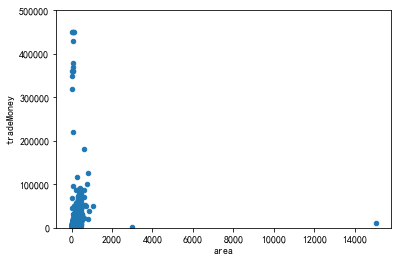

In [65]:
#分析某个元素与结果列（saleprice）的关系
data=pd.concat([train['tradeMoney'],train['area']],axis=1)
data.plot.scatter(x='area',y='tradeMoney',ylim=(0,500000))
plt.show()

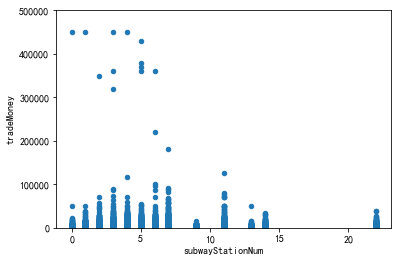

In [66]:
data=pd.concat([train['tradeMoney'],train['subwayStationNum']],axis=1)
data.plot.scatter(x='subwayStationNum',y='tradeMoney',ylim=(0,500000))
plt.show()


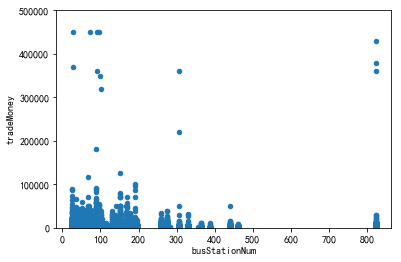

In [67]:
data=pd.concat([train['tradeMoney'],train['busStationNum']],axis=1)
data.plot.scatter(x='busStationNum',y='tradeMoney',ylim=(0,500000))
plt.show()

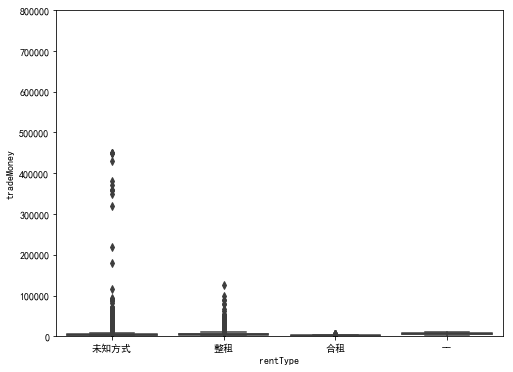

In [68]:
#以上都是数值型数据与房价的分布，下面时类别型数据与房价的分布描述

data = pd.concat([train['tradeMoney'], train['rentType']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='rentType', y="tradeMoney", data=data)
fig.axis(ymin=0, ymax=800000);
plt.show()

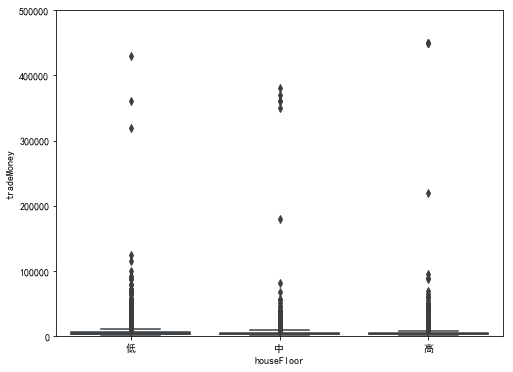

In [69]:
data = pd.concat([train['tradeMoney'], train['houseFloor']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='houseFloor', y="tradeMoney", data=data)
fig.axis(ymin=0, ymax=500000);
plt.show()

In [27]:
#直接区分数值型和别的类型
numeric_dtypes=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
all_feature=train.columns
#去掉两个不同无关列
drop_feature=['ID','tradeMoney']
num_feature=[]
other_feature=[]
for i in train.columns:
    if i not in drop_feature:
        if train[i].dtype in numeric_dtypes:
            num_feature.append(i)
        else:
            other_feature.append(i)
print("num_feature number of %s"%len(num_feature))
print("other_feature number of %s" % len(other_feature))


num_feature number of 38
other_feature number of 11


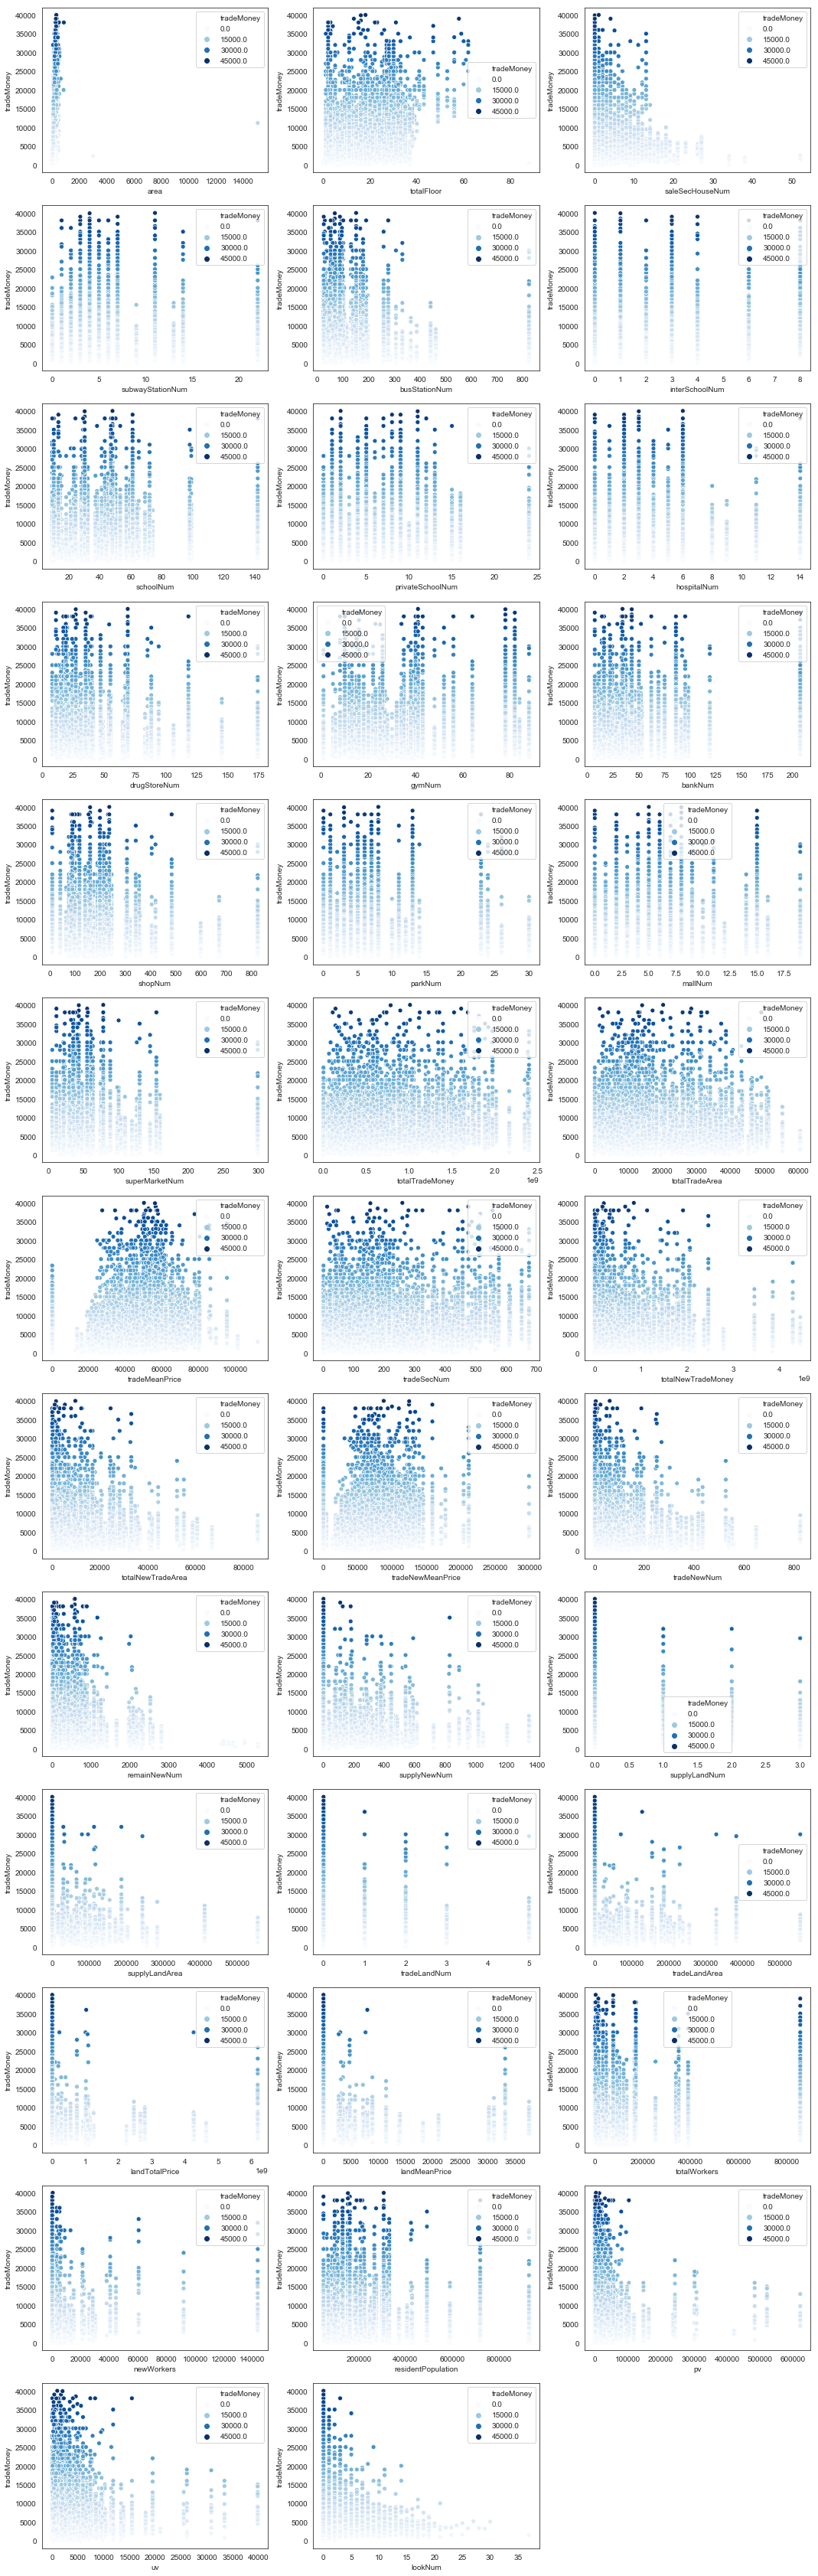

In [29]:
# 绘制数值特征跟目标变量的散点图
fig,ax=plt.subplots(ncols=2,nrows=0,figsize=(18,180))
for i,feature in enumerate(num_feature,1):
    plt.subplot(len(num_feature),3,i)
    sns.scatterplot(x=feature, y='tradeMoney', hue='tradeMoney', palette='Blues', data=train)

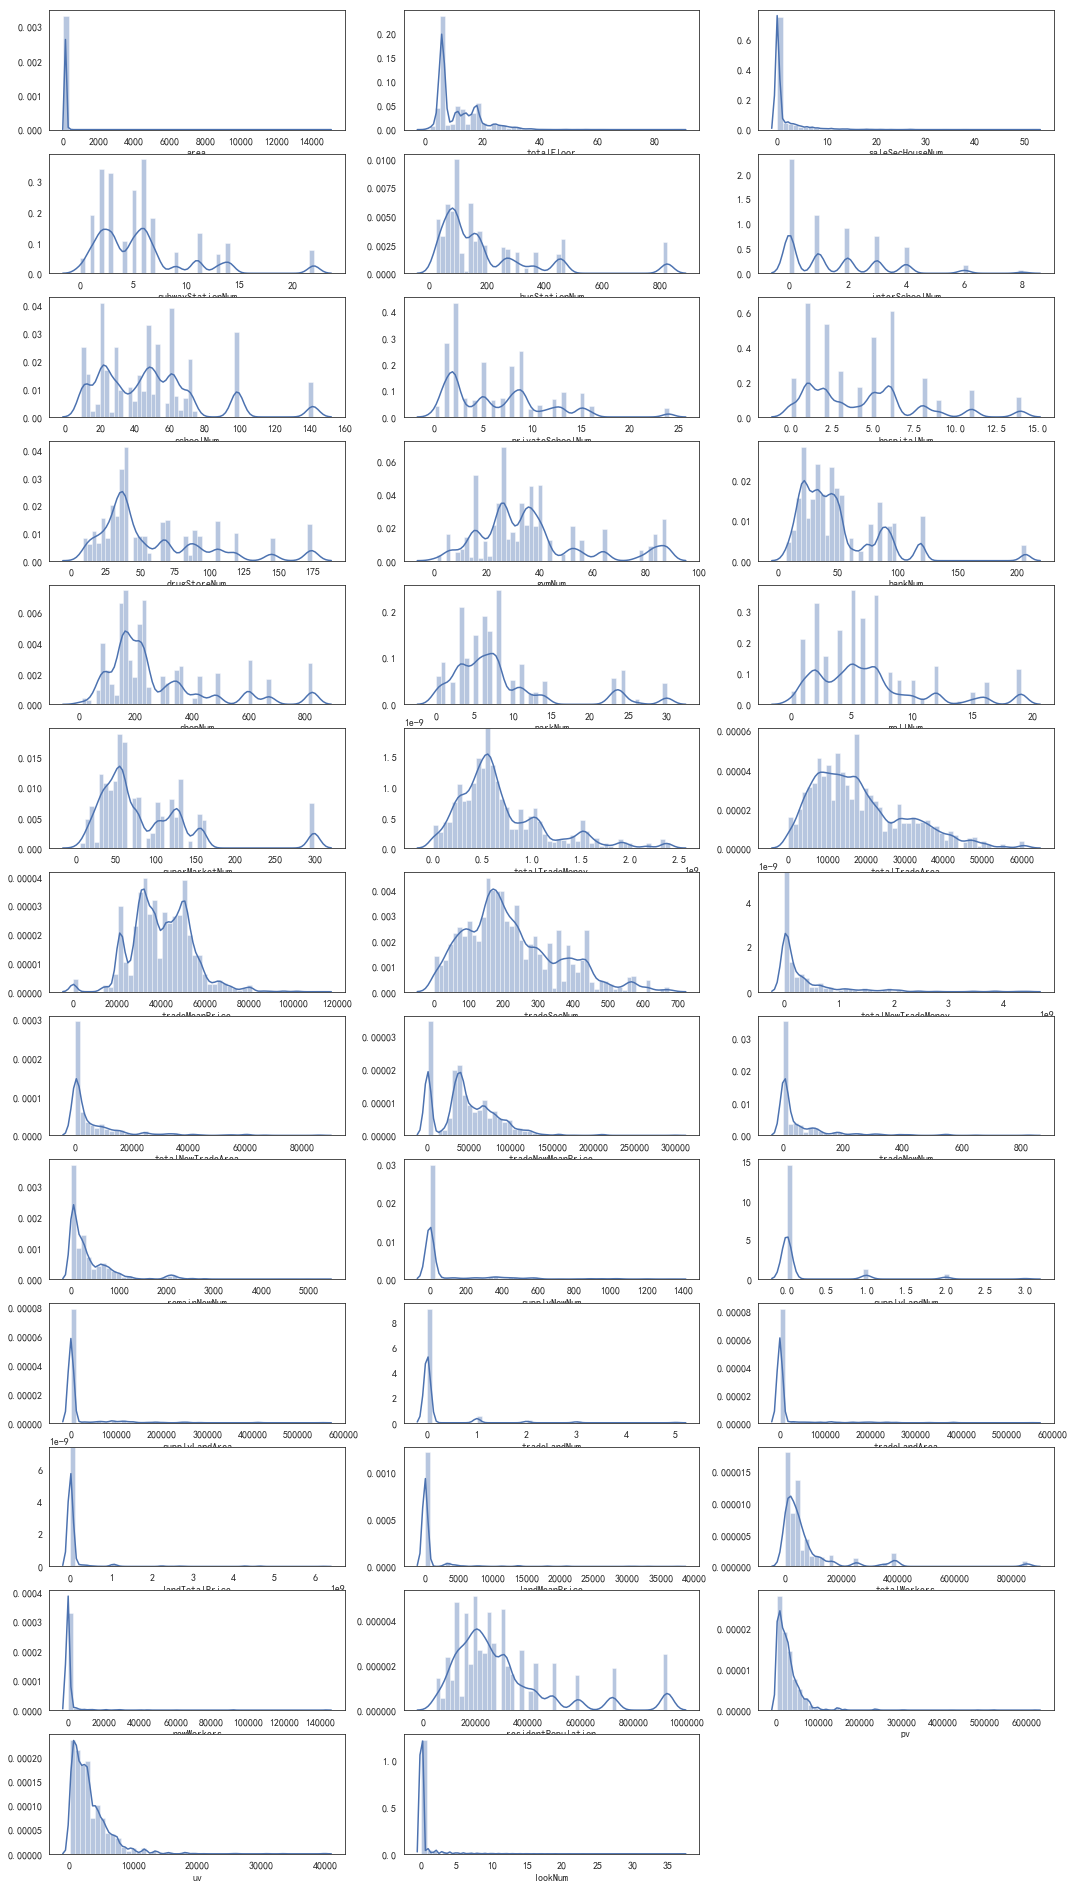

In [45]:
# 绘制数值特征分布图
sns.set_color_codes(palette="deep")
fig,axs=plt.subplots(ncols=2, nrows=0, figsize=(18, 180))
for i, feature in enumerate(num_feature, 1):
    plt.subplot(len(num_feature), 3, i)
    sns.distplot(train[train[feature].notnull()][feature], color='b')

In [32]:
# 查看其他特征
train[other_feature].head()

,rentType,houseType,houseFloor,houseToward,houseDecoration,communityName,city,region,plate,buildYear,tradeTime
0,未知方式,2室1厅1卫,低,暂无数据,其他,XQ00051,SH,RG00001,BK00064,1953,2018/11/28
1,未知方式,3室2厅2卫,中,暂无数据,简装,XQ00130,SH,RG00002,BK00049,2007,2018/12/16
2,未知方式,3室2厅2卫,低,暂无数据,其他,XQ00179,SH,RG00002,BK00050,暂无信息,2018/12/22
3,未知方式,1室1厅1卫,中,暂无数据,精装,XQ00313,SH,RG00002,BK00051,暂无信息,2018/12/21
4,未知方式,3室2厅3卫,低,暂无数据,毛坯,XQ01257,SH,RG00003,BK00044,暂无信息,2018/11/18


In [38]:
#.nunique()是查看该序列(axis=0/1对应着列或行)的不同值的数量。用这个函数可以查看数据有多少个不同值
for i in other_feature:
    print("{:<30}: {:>5}".format(i,train[i].nunique()))

rentType                      :     4
houseType                     :    99
houseFloor                    :     3
houseToward                   :    10
houseDecoration               :     4
communityName                 :  4210
city                          :     1
region                        :    15
plate                         :    66
buildYear                     :    80
tradeTime                     :   361


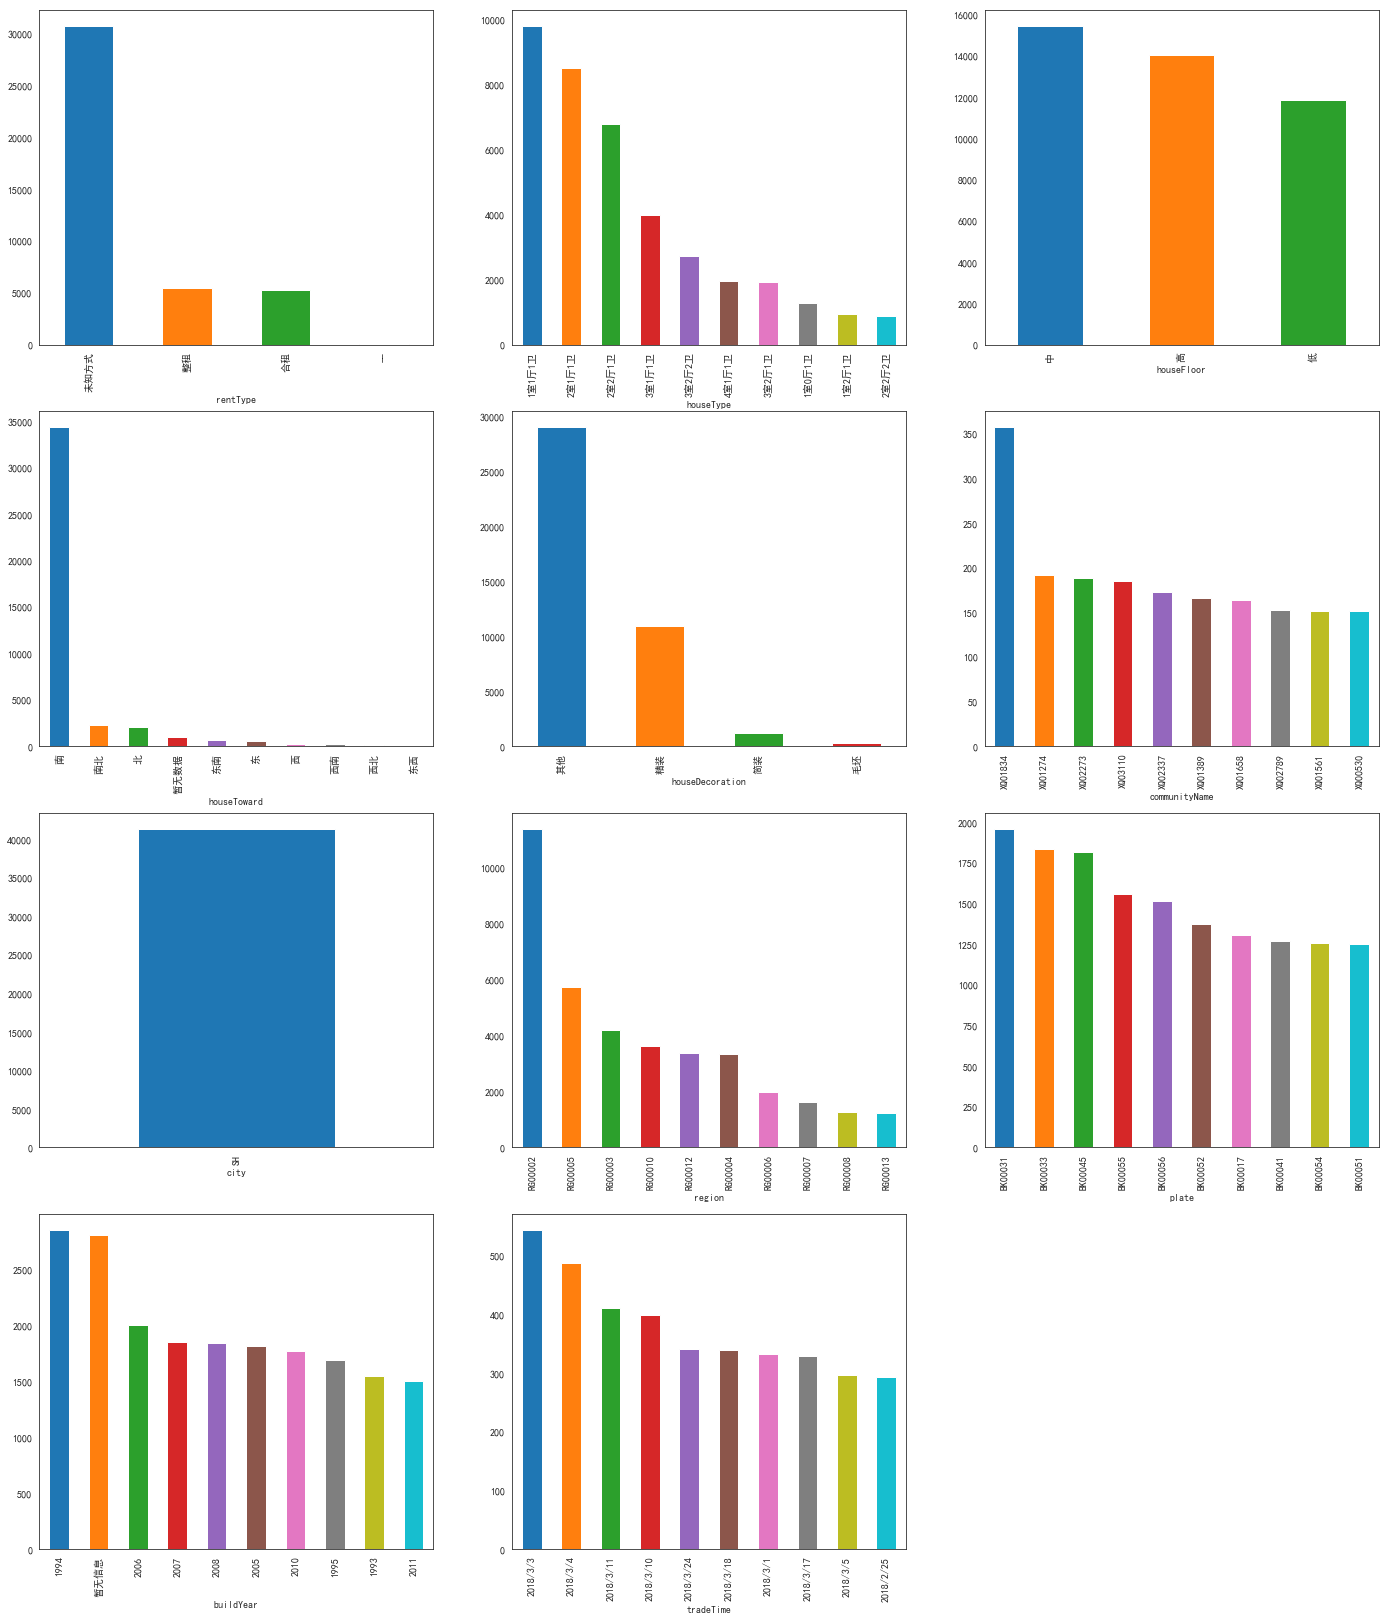

In [50]:
#显示所有结果
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

fig,ax=plt.subplots(ncols=3, nrows=0,figsize=(24,80))
for i,feature in enumerate(other_feature,1):
    plt.rcParams['font.sans-serif']=['SimHei']
    
    plt.subplot(len(other_feature),3,i)
    train[feature].value_counts()[:10].plot.bar()
    plt.xlabel(feature)

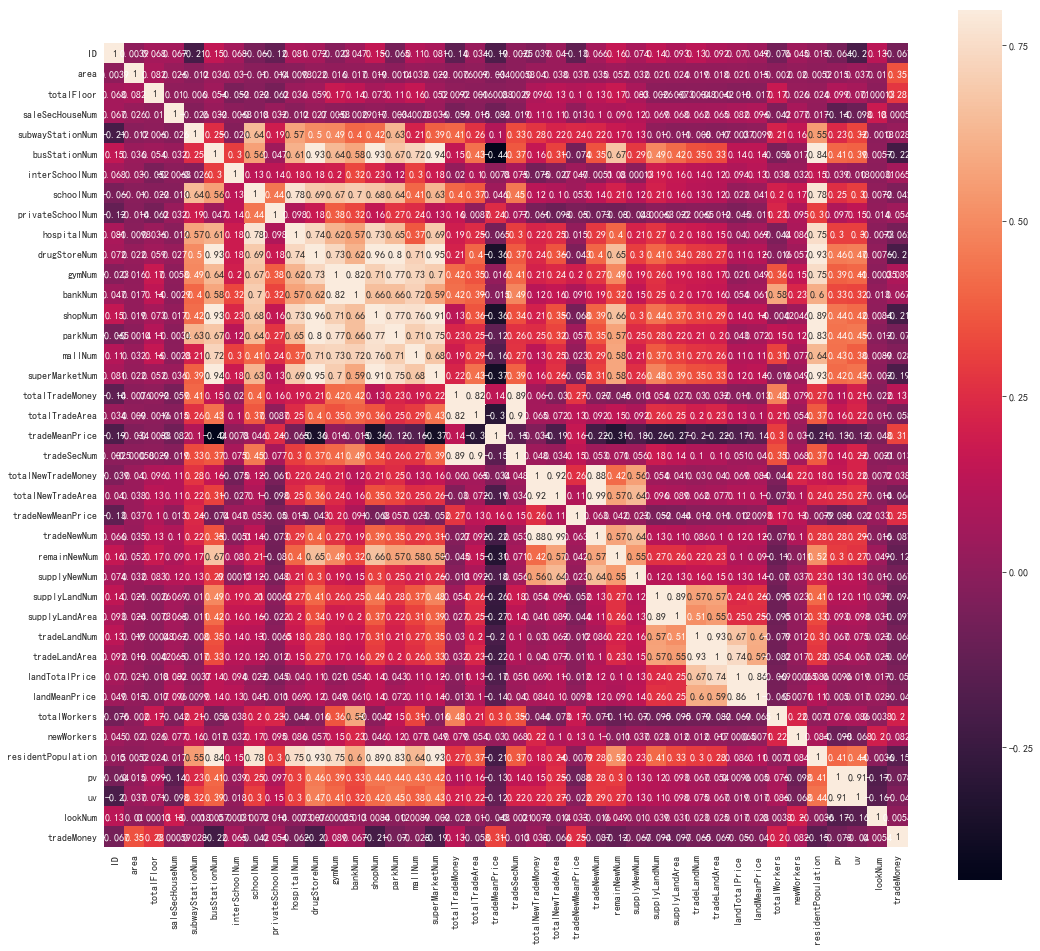

In [54]:
corrmat=train.corr()
fig,ax=plt.subplots(figsize=(18,16))
sns.heatmap(corrmat,vmax=0.8,square=True,annot=True)